In [1]:
from Annotation_helper import *

In [2]:
transactions = load_transactions("../../Data/structured_data\VOC Cochin Slave Transactions 1706-1801 - IISH - Database - 2018 - v1.csv")
permissions = load_permissions("../../Data/structured_data\VOC Cochin Slave Transport Permissions 1770-1795 - IISH - Database - 2018 - v1.csv")

In [3]:
per_to_trans = {
                "BezitterVoornaam" : ("KoperVoornaam", 2),
                "BezitterTussen": ("KoperTussen", 1),
                "BezitterAchternaam" : ("KoperAchternaam", 2),
                "SlaafNaamNieuw" : ("SlaafNaamNieuw", 2),
                "BezitterBeroep" : ("KoperBeroep", 1),
                "BezitterStatus" : ("KoperStatus", 1),
                "SlaafGender" : ("SlaafGender", 1),
                "Datum" : ("Datum", 1),
                "BezitterWerkplek" : ("KoperWerkplek", 1),
                "SlaafKaste" : ("SlaafKaste", 1)
}

In [4]:
get_n_dict_value(per_to_trans).values()

dict_values(['KoperVoornaam', 'KoperTussen', 'KoperAchternaam', 'SlaafNaamNieuw', 'KoperBeroep', 'KoperStatus', 'SlaafGender', 'Datum', 'KoperWerkplek', 'SlaafKaste'])

In [5]:
transactions[transactions["ID"] == "896-321-1"][get_n_dict_value(per_to_trans).values()]

,KoperVoornaam,KoperTussen,KoperAchternaam,SlaafNaamNieuw,KoperBeroep,KoperStatus,SlaafGender,Datum,KoperWerkplek,SlaafKaste
4404,Philip,NaN,Philips,October,NaN,Vrijman,m,1771-08-03,NaN,Namboe


In [6]:
permissions[permissions["ID"] == "897-3-21"][per_to_trans.keys()]

,BezitterVoornaam,BezitterTussen,BezitterAchternaam,SlaafNaamNieuw,BezitterBeroep,BezitterStatus,SlaafGender,Datum,BezitterWerkplek,SlaafKaste
74,Philip,NaN,Philipsz:,October,NaN,Vrijman,m,1770-10-12,NaN,NaN


In [7]:
fuzz.ratio("Phillips", "Phillipz")

88

In [8]:
fuzz.ratio("Phillips", "Phillips")

100

In [9]:
print(transactions.iloc[:,1:-2].head().to_latex())

\begin{tabular}{lllllllllllllllllllllllllllll}
\toprule
{} &       ID &       Datum & VerkoperVoornaam & VerkoperPatroniem & VerkoperTussen & VerkoperAchternaam & VerkoperGender & VerkoperHerkomst & VerkoperBeroep &    VerkoperWerkplek & VerkoperEtniciteit & VerkoperStatus & KoperVoornaam & KoperPatroniem & KoperTussen & KoperAchternaam & KoperGender & KoperHerkomst & KoperBeroep &     KoperWerkplek & KoperEtniciteit & KoperStatus & SlaafNaamNieuw & SlaafNaamOrigineel & SlaafTaalNaam & SlaafKaste & SlaafGender & SlaafLeeftijd \\
\midrule
0 &  554-1-1 &  1753-01-02 &          Michiel &               NaN &            NaN &             Kruijs &              m &              NaN &      Metselaar &              Cochin &                NaN &            VOC &        Gillis &            NaN &         NaN &          Dabijn &           m &           NaN &    Capitain &  Schip Sloterdijk &             NaN &         VOC &       December &                NaN &           NaN &        NaN &          

In [10]:
print(permissions.head().to_latex())

\begin{tabular}{llrrrlllrlllllllllllllll}
\toprule
{} &       ID &  Permissie &  Inventarisnummer &  Scan &  Plaats &       Datum & BezitterVoornaam &  BezitterPatroniem & BezitterTussen & BezitterAchternaam & BezitterGender & BezitterHerkomst & BezitterBeroep & BezitterWerkplek & BezitterEtniciteit & BezitterStatus & SlaafNaamNieuw & SlaafNaamOrigineel & SlaafKaste & SlaafGender & Opmerking &                                           Betaling & Door[Kantlijn] \\
\midrule
0 &  897-1-1 &          1 &               897 &     1 &  Cochin &  1770-08-06 &              NaN &                NaN &            NaN &                NaN &            NaN &              NaN &            NaN &              NaN &                NaN &            NaN &         Tutius &                NaN &        NaN &           m &       NaN &  Mits betalende geregtigheijd aan den pagter en... &            NaN \\
1 &  897-1-2 &          2 &               897 &     1 &  Cochin &  1770-08-06 &              NaN &         

# Translation table

In [11]:
pd.DataFrame(get_n_dict_value(per_to_trans), index=[0])

,BezitterVoornaam,BezitterTussen,BezitterAchternaam,SlaafNaamNieuw,BezitterBeroep,BezitterStatus,SlaafGender,Datum,BezitterWerkplek,SlaafKaste
0,KoperVoornaam,KoperTussen,KoperAchternaam,SlaafNaamNieuw,KoperBeroep,KoperStatus,SlaafGender,Datum,KoperWerkplek,SlaafKaste


In [12]:
res = pd.DataFrame.from_dict(get_n_dict_value(per_to_trans), orient='index').reset_index().rename(columns={"index": "permission dataset", 0: "transaction dataset"})

In [13]:
print(res.to_latex(index=False))

\begin{tabular}{ll}
\toprule
permission dataset & transaction dataset \\
\midrule
  BezitterVoornaam &       KoperVoornaam \\
    BezitterTussen &         KoperTussen \\
BezitterAchternaam &     KoperAchternaam \\
    SlaafNaamNieuw &      SlaafNaamNieuw \\
    BezitterBeroep &         KoperBeroep \\
    BezitterStatus &         KoperStatus \\
       SlaafGender &         SlaafGender \\
             Datum &               Datum \\
  BezitterWerkplek &       KoperWerkplek \\
        SlaafKaste &          SlaafKaste \\
\bottomrule
\end{tabular}



# Plot methods

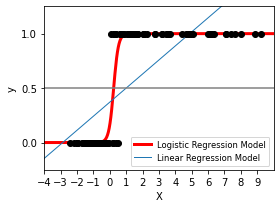

In [14]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    ("Logistic Regression Model", "Linear Regression Model"),
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()